
# Lab 2: sport vs politics

**Requirement:**

Build a system that:

1. Everyday collects a large set of random tweets and groups them in tweets about politics and about sport
2. For each of the two groups, shows the main topics of discussion

## 1. Group Tweets by sport and politics: supervised approach

### Data Collection

Tweepy is a Python library for accessing the Twitter API. Here is used to extract text from the tweets to build our dataset.

First we authenticate in order to use the API.

In [1]:
import tweepy

bearer_token = "your bearer token" # Twitter API
client = tweepy.Client(bearer_token=bearer_token) # OAuth2.0 Version

Three request are made to get the tweets from the topics:
- sport
- politics
- random topic.

In [2]:
import pandas as pd

limit = 1000 # nr. tweets

# request sports tweets
query_sports = 'context:47.10050757844 -is:retweet lang:en'
tweets_sports = tweepy.Paginator(client.search_recent_tweets, query=query_sports,
                              tweet_fields=['text'], max_results=100).flatten(limit=limit)

df_tweets_sports = pd.DataFrame([tweet.text for tweet in tweets_sports]) # convert to pandas df

# request politics tweets
query_politics = 'context:131.1291447199595782144 -is:retweet lang:en'
tweets_politics = tweepy.Paginator(client.search_recent_tweets, query=query_politics,
                              tweet_fields=['text'], max_results=100).flatten(limit=limit)

df_tweets_politics = pd.DataFrame([tweet.text for tweet in tweets_politics]) # convert to pandas df

# request random tweets
query_random = 'a lang:en' # fix this
tweets_random = tweepy.Paginator(client.search_recent_tweets, query=query_random,
                              tweet_fields=['text'], max_results=100).flatten(limit=limit)

df_tweets_random = pd.DataFrame([tweet.text for tweet in tweets_random]) # convert to pandas df

The three groups will be the labels for each class, so in future they can be used with supervised learning.

Then all the collected data is concatenated in an unique dataset and saved to a .csv file.

In [3]:
# add label column
df_tweets_sports['y'] = 0
df_tweets_politics['y'] = 1
df_tweets_random['y'] = 2


# concatenate data by rows
df_D = pd.concat([df_tweets_politics, df_tweets_sports, df_tweets_random], axis = 0)
df_D = df_D.rename({0: 'X',}, axis=1) # rename features data to X
display(df_D)

# export to csv
df_D.to_csv("data/dataset.csv", encoding='utf-8')

,X,y
0,@Cheers_NMk @RC123TC @RobertBritto4 @rekastner...,1
1,@joeybaggadonuzz @KariLake @MaricopaVote And y...,1
2,@DineshDSouza FIX INFLATION AND GAS PRICES LIK...,1
3,@GovRonDeSantis @CaseyDeSantis Not being able ...,1
4,@DougDucey @katiehobbs Spineless as usual.,1
...,...,...
995,RT @centredevils: 🚨🚨| JUST IN: Part of Tim Coo...,2
996,@cutanddried @PennyMordaunt But when you are a...,2
997,I had such a long day. At least it's ending we...,2
998,Queen Consort Arrives for a Very Special Teddy...,2


### Pre-processing

Collected data is loaded from the .csv file.

The dataset is composed by tweets labeled by politics and sport topics.
- y=0 are sport tweets
- y=1 are politics tweets
- y=2 are random tweets

In [4]:
# load dataset
df_D = pd.read_csv("data/dataset.csv")
display(df_D)

,Unnamed: 0,X,y
0,0,@Cheers_NMk @RC123TC @RobertBritto4 @rekastner...,1
1,1,@joeybaggadonuzz @KariLake @MaricopaVote And y...,1
2,2,@DineshDSouza FIX INFLATION AND GAS PRICES LIK...,1
3,3,@GovRonDeSantis @CaseyDeSantis Not being able ...,1
4,4,@DougDucey @katiehobbs Spineless as usual.,1
...,...,...,...
2995,995,RT @centredevils: 🚨🚨| JUST IN: Part of Tim Coo...,2
2996,996,@cutanddried @PennyMordaunt But when you are a...,2
2997,997,I had such a long day. At least it's ending we...,2
2998,998,Queen Consort Arrives for a Very Special Teddy...,2


#### Bag-of-Words

Is used the scikit-learn implementation of bag of word using the CountVectorizer class.
It take an array of text as input and return a bag-of-words model.

##### Less frequently words
To lower the dimension we can clean the words that appears less frequently, is used the "min_df" to set the minimum number of documents that the word needs to appear in.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=5)
count.fit(df_D.loc[:,'X']) # generate Bag-of-words model

print("Vocabulary size: {}". format(len(count.vocabulary_)))
print("Vocabulary content:\n {}".format(count.vocabulary_))

Vocabulary size: 1413
Vocabulary content:
 {'rc123tc': 991, 'robertbritto4': 1033, 'rekastner': 1011, 'johnfetterman': 661, 'no': 850, 'laws': 706, 'are': 80, 'made': 757, 'to': 1242, 'illegal': 616, 'and': 69, 'provide': 970, 'if': 614, 'one': 879, 'it': 648, 'karilake': 671, 'maricopavote': 770, 'you': 1405, 'really': 1001, 'believe': 123, 'that': 1207, 'old': 876, 'man': 765, 'who': 1361, 'only': 881, 'had': 546, 'few': 434, 'with': 1372, 'turn': 1273, 'out': 888, 'won': 1377, 'more': 811, 'votes': 1321, 'than': 1202, 'any': 73, 'other': 886, 'president': 951, 'in': 623, 'history': 591, 'yeah': 1399, 'he': 566, 'stole': 1157, 'hell': 573, 'over': 889, 'very': 1309, 'fact': 415, 'but': 172, 'twitter': 1280, 'its': 649, 'day': 300, 'of': 867, 'mass': 772, 'fix': 452, 'inflation': 629, 'gas': 492, 'prices': 957, 'like': 726, 'not': 856, 'being': 122, 'able': 26, 'find': 445, 'job': 657, 'pay': 905, 'enough': 387, 'for': 460, 'my': 826, 'rent': 1013, 'match': 773, 'the': 1208, 'on': 877

#### Stemming
We can further improve our bag-of-words pre-processing using a normalization technique called stemming.
The idea is to reduce each word to its stem, using the stemming algorithm (rule-based heuristic).
For example a stemmer reduce words like "climber", "climbed" and "climbing" to "climb".

The Natural Language Toolkit for Python (NLTK, http://www.nltk.org) implements the Snowball stemming algorithm.

In [6]:
# Apply advance tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# create a function to 
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("The pink sweater fit her perfectly") # test

count = CountVectorizer(tokenizer = tokenizer_snowballStemmer, min_df=5) # use tokenizer function
count.fit(df_D.loc[:,'X']) # generate Bag-of-words

print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
#print("Vocabulary content:\n {}".format(count.vocabulary_))

/Users/agustin/opt/anaconda3/envs/ml_lab/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary size using stemming: 1389


### Modeling

Shuffle and divide the data in Training and Test set.

In [7]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(
    df_D.loc[:,'X'], df_D.loc[:,'y'], test_size=0.3, random_state=0, shuffle=True)

Then apply the previous pre-processing methods for text. The transformation is applied to the Training set and then the Test set.

In [8]:
# generate bag of word model
count = CountVectorizer(tokenizer=tokenizer_snowballStemmer, min_df=5).fit(X_train)

# apply transformation to the data
X_train_bow = count.transform(X_train)
print("X_train: {}".format(X_train_bow.shape))

X_test_bow = count.transform(X_test)
print("X_test: {}".format(X_test_bow.shape))

X_train: (2100, 1017)
X_test: (900, 1017)


Fit a Random Forest model on the Training set.

In [80]:
from sklearn.ensemble import RandomForestClassifier

# fit a Random Forest model
clf = RandomForestClassifier(n_estimators=100)

Check the model performance using cross validation (on the training set) and show the accuracy results.

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# plot CV results
scores = cross_val_score(clf, X_train_bow, y_train, cv=5, scoring='accuracy')
display("Cross Validation scores")
i=1
for a in scores:
    display("Accuracy cv=" + str(i) + ": " + str(round(a*100, 2)))
    i = i+1

display("Accuracy MEAN: "+str(round(scores.mean(),2)*100))

'Cross Validation scores'

'Accuracy cv=1: 93.1'

'Accuracy cv=2: 93.57'

'Accuracy cv=3: 94.52'

'Accuracy cv=4: 95.0'

'Accuracy cv=5: 95.0'

'Accuracy MEAN: 94.0'

Now the model is tested on the Test set. Are then plotted the accuracy and the confusion matrix.

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = clf.fit(X_train_bow, y_train)

# results on test set
predictions = clf.predict(X_test_bow)
test_accuracy = accuracy_score(predictions, y_test)
display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

display(confusion_matrix(predictions, y_test)) # display confusion matrix

'Test set accuracy: 95.0'

array([[274,   2,   0],
       [ 17, 309,   5],
       [  7,  14, 272]])

## 2. Group by main topics: unsupervised approach

The request is now to show the main topics. Is used an unsupervised approach.

Since we have already split in Training and Test set we can work on the Training set. Is tried first the same pre-processing of the point 1: a bag-of-word with stemming and minimum frequency. Let's take the already pre-processed Training set. 

Let's first divide it between the sports and politics.

In [50]:
X_train_bow_sports = X_train_bow[y_train==0]
print("X_train_bow_sports: {}".format(X_train_bow_sports.shape))

X_train_bow_politics = X_train_bow[y_train==1]
print("X_train_bow_politics: {}".format(X_train_bow_politics.shape))

# we save also the original data to be anlyzed for the next steps
X_train_sports = X_train.loc[y_train==0]
X_train_politics = X_train.loc[y_train==1]

X_train_bow_sports: (702, 1017)
X_train_bow_politics: (675, 1017)


### Modeling

We can now try a hierarchical clustering algorithm on our data. To choose the *k* first we explore the data generating a dendogram.


In [26]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# use the pre-built scikit learn function
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Hierarchical Clustering Dendrograms:


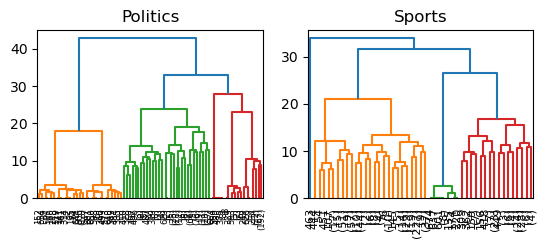

In [83]:
plt.figure(101)
print('Hierarchical Clustering Dendrograms:')

plt.subplot(2, 2, 1)
plt.title("Politics")
model_nocluster_politics = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_train_bow_politics.toarray())
plot_dendrogram(model_nocluster_politics, truncate_mode="level", p=6)

plt.subplot(2, 2, 2)
plt.title("Sports")
model_nocluster_sports = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_train_bow_sports.toarray())
plot_dendrogram(model_nocluster_sports, truncate_mode="level", p=6)

plt.show()

In [86]:
model_ac_politics = AgglomerativeClustering(n_clusters=3).fit(X_train_bow_politics.toarray())
y_train_bow_politics = model_ac_politics.fit_predict(X_train_bow_politics.toarray())

model_ac_sports = AgglomerativeClustering(n_clusters=3).fit(X_train_bow_sports.toarray())
y_train_bow_sports = model_ac_sports.fit_predict(X_train_bow_sports.toarray())

In [85]:
for i in range(0, 1000):
    i = i+150
    if y_train_bow_politics[i]==1:
        display("Class: " + str(y_train_bow_politics[i]) + " Text: "+str(X_train_politics.iloc[i]))

'Class: 1 Text: @KariLakeWarRoom @TruthisFreedo16 @katiehobbs Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/16BYmeSaEv leaked in alpha group'

'Class: 1 Text: @TudorDixon @PaulRFuller14 @hernandez4ltgov Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/VCmEFymvFk leaked in alpha group'

'Class: 1 Text: @hodlbz @nopenottodaye @JohnFetterman I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/mKZI7x0fRg leaked in alpha group'

'Class: 1 Text: @KariLake @zzprosper Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/Q0Jm0ca356 leaked in alpha group'

'Class: 1 Text: @KariLake @deb_noname @GeneralBrnovich Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/bewEqRP0Xs leaked in alpha group'

'Class: 1 Text: @KariLake @TammyHauldren Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/IsXwDDGAnj leaked in alpha group'

'Class: 1 Text: @GregAbbott_TX @AmericaFirst60 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/vbGDDWQSp4 leaked in alpha group'

'Class: 1 Text: @KariLake @JohnAWilsonII Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/ranSBNPEml leaked in alpha group'

'Class: 1 Text: @KariLake @rebeccajoc Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/n68oqZEf6S leaked in alpha group'

'Class: 1 Text: @KariLake @momomanaz @GeneralBrnovich Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/F4dzAHqEtc leaked in alpha group'

'Class: 1 Text: @KariLakeWarRoom @JaCo00188220 @RepMattGaetz I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/k3rEy7rW6B leaked in alpha group'

'Class: 1 Text: @demlish4love @dannyalziansyah @danimlke @duncan_colton @Clouds19712 @KariLake I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/BKf8BNO8wZ leaked in alpha group'

'Class: 1 Text: @duncan_colton @jakedunn_27 @KariLake Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/2MzgPGkEEX leaked in alpha group'

'Class: 1 Text: @KariLake @flwrpatriot I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/NoSeS2OOoQ leaked in alpha group'

'Class: 1 Text: @KariLake @CCross1776 @Liz_Cheney Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/BYINLzZAkG leaked in alpha group'

'Class: 1 Text: @KariLake @samcastle77 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/UMN4ExRxuS leaked in alpha group'

'Class: 1 Text: @KariLake @BigTecSuckz I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/hjhaF6gGrM leaked in alpha group'

'Class: 1 Text: @KariLake @clars1988 I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/e52ddl7wSF leaked in alpha group'

'Class: 1 Text: @DonaldJTrumpJr @Hibbzs @bgmasters @KariLake @AbrahamHamadeh @AZGOP Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/vB2VA0bVXK leaked in alpha group'

'Class: 1 Text: @KariLake @ghccre Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/KNEmziwbBF leaked in alpha group'

'Class: 1 Text: @KariLake @LisanItaly I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/uZAWF3pumF leaked in alpha group'

'Class: 1 Text: @frankfurter97 @onion_flower @DougDucey @katiehobbs I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/qdShVsljsh leaked in alpha group'

'Class: 1 Text: @Heshamelsayed85 @dannyalziansyah @danimlke @duncan_colton @Clouds19712 @KariLake I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/guw3tmHBF4 leaked in alpha group'

'Class: 1 Text: @KariLake @MariaBonds50 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/8Z363zQOk1 leaked in alpha group'

'Class: 1 Text: @Heshamelsayed85 @dannyalziansyah @danimlke @duncan_colton @Clouds19712 @KariLake Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/XPcO7aWqid leaked in alpha group'

'Class: 1 Text: @KariLake @RabbitSnow99 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/g1sljdreez leaked in alpha group'

'Class: 1 Text: @hatemhasan49 @jonelortilano @villosorowena @KariLake @PAMGRIGGS308 @GeneralBrnovich I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/7aFOw1zbRZ leaked in alpha group'

'Class: 1 Text: @KariLakeWarRoom @CDJohnson1902 @billgatesaz @stephen_richer @katiehobbs I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/Vtn6ELNLko leaked in alpha group'

'Class: 1 Text: @KariLake @KarlMcmillen I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/J51fWPre8E leaked in alpha group'

'Class: 1 Text: @MayraFlores2022 @JudiDupuy I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/OfccXj7l7l leaked in alpha group'

'Class: 1 Text: @MayraFlores2022 @patfleming0731 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/d1VldylETx leaked in alpha group'

'Class: 1 Text: @KariLake @dinolde I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/gLAAtP5F8t leaked in alpha group'

'Class: 1 Text: @KariLake @PhillipCisner88 @GeneralBrnovich I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/3uyCZ0t5vU leaked in alpha group'

'Class: 1 Text: @KariLake @Jon_Robison @katiehobbs Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/bsWC57LTOD leaked in alpha group'

'Class: 1 Text: @KariLake @tomthom55821099 Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/pRLpLIotUF leaked in alpha group'

'Class: 1 Text: @MayraFlores2022 @WilliamSevern1 I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/8Eeeilp08O leaked in alpha group'

'Class: 1 Text: @KariLakeWarRoom @servme2 @stephen_richer @KariLake Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/JgrKvo8KbQ leaked in alpha group'

'Class: 1 Text: @DominofromAZ @Achazz881 @KariLake I Wish I discovered this earlier. Uniswap is being exploited by this dude. More than $200k so far https://t.co/PT8fKkOz5Y leaked in alpha group'

'Class: 1 Text: @KariLakeWarRoom @DebHeacox Why is nobody talking about this? Uniswap is being exploited by this dude. More than $200k so far https://t.co/R5fociQItz leaked in alpha group'

IndexError: index 675 is out of bounds for axis 0 with size 675